In [7]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import re

from matplotlib.patches import Circle, Rectangle, Arc

In [8]:
###
# VARIABLE INPUTS IN THIS CELL:

# Text data inputs:
# NOTE: Use '*' to select all:
date = "1/6/2018"          # m/d/yyyy format
team = "Penn"
opponent = "*"

# Number data inputs:
# NOTE: Use '-1' to select all:
playerID = -1        # jersey number
half = -1          # OT1 = half 3, OT2 = half 4, ...
time_max = -1      # mmss format, max time remaining in selected half(s)
distance_min = -1  # min shot distance in feet
distance_max = -1  # max shot distance in feet

# Image inputs:
label = "Penn"  # team or player name (for graph label)
title = "Penn shooting vs Princeton"  # chart title
output = 'imgs/example.jpg'  # output file

###

In [9]:
# setup dicts:
make_colors = {'Brown': '#734d26', 'Columbia':'#3366ff', 'Cornell': '#ff0000', 'Dartmouth': '#336600', 'Harvard':'#990000', 'Penn':'#990000', 'Princeton':'#cc6600', 'Yale':'#000099', '*':'#336600'}
foul_colors = {'Brown': '#d2a679', 'Columbia':'#99ccff', 'Cornell': '#ff9999', 'Dartmouth': '#bbff33', 'Harvard':'#ff8080', 'Penn':'#ff8080', 'Princeton':'#ffcc99', 'Yale':'#8080ff', '*':'#bbff33'}

In [10]:
# static parameters:
file_path = "ivyshots_2018_selected.csv"
make_color = make_colors[team]
foul_color = foul_colors[team]

In [11]:
def get_shot_data(path):
    #path = "temp_file_2.csv"
    #r = requests.get(url)
    #text = r.text
    #shot_data = re.findall(shot_data_pattern, text)[0]
    #with open(path, "w+") as f:
    #    f.write(shot_data.replace("~", "\n"))
    shot_data_df = pd.read_csv(path, header=0, index_col=None)
    #shot_data_df.rename(columns={0: "homeAway", 
     #                            1: "timeRemaining", 
      #                           2: "half", 
    #                             3: "playerID", 
    #                             4: "shotType", 
     #                            5: "makeMiss",
      #                           6: "x",
       #                          7: "y", 
        #                         8: "distance"}, inplace=True)
    return shot_data_df

In [12]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=0.75, linewidth=lw, color=color, fill=False, alpha=0.75)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    # outer_box = Rectangle((-8, -4), 16, 18, linewidth=lw, color=color,
    #                       fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-6, -4), 12, 18, linewidth=lw, color=color,
                          fill=False, alpha=0.75)

    # Create free throw top arc
    top_free_throw = Arc((0, 14), 12, 12, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, linestyle='solid', alpha=0.75)
    # Create free throw bottom arc
    # bottom_free_throw = Arc((0, 14), 12, 12, theta1=180, theta2=0,
    #                         linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 8, 8, theta1=0, theta2=180, linewidth=lw,
                     color=color, linestyle='dashed', alpha=0.75)

    # 3pt arc - center of arc will be the hoop, arc is 20'9" away from hoop
    three_arc = Arc((0, 0), 41.2, 41.2, theta1=0, theta2=180, linewidth=lw,
                    color=color, alpha=0.75)
    
    # 3pt sideline
    three_left = Rectangle((-20.6, -4), 0, 4.25, linewidth=lw, 
                           color=color, fill=False, alpha=0.75)

    three_right = Rectangle((20.6, -4), 0, 4.25, linewidth=lw, 
                           color=color, fill=False, alpha=0.75)

    # Center Court
    center_outer_arc = Arc((0, 43), 12, 12, theta1=18, theta2=0,
                           linewidth=lw, color=color, alpha=0.75)
    center_inner_arc = Arc((0, 43), 4, 4, theta1=1.8, theta2=0,
                           linewidth=lw, color=color, alpha=0.75)

    # List of the court elements to be plotted onto the axes
    #court_elements = [hoop, outer_box, inner_box, 
    #                  three_arc, top_free_throw, bottom_free_throw, 
    #                  restricted, center_outer_arc, center_inner_arc, three_right, three_left]
    court_elements = [hoop, inner_box, 
                      three_arc, top_free_throw, 
                      restricted, center_outer_arc, center_inner_arc, three_right, three_left]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-25, -4), 50, 47, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    ax.set_axis_bgcolor('white')
    
    return ax

In [13]:
shots_df = get_shot_data(file_path)


# filter based on inputs:
if date <> "*":
    shots_df = shots_df[shots_df['Date'] == date]

if team <> "*":
    shots_df = shots_df[shots_df['Team'] == team]
    
if opponent <> "*":
    shots_df = shots_df[shots_df['Opponent'] == opponent]


if playerID >= 0:
    shots_df = shots_df[shots_df['playerID'] == playerID]

if half > 0:
    shots_df = shots_df[shots_df['half'] == half]

if time_max > 0:
    shots_df = shots_df[shots_df['timeRemaining'] <= time_max]

if distance_min > -1:
    shots_df = shots_df[shots_df['distance'] >= distance_min]

if distance_max > -1:
    shots_df = shots_df[shots_df['distance'] <= distance_max]


In [14]:
makes = shots_df[(shots_df["makeMiss"] == 1)]
misses = shots_df[(shots_df["makeMiss"] == 0)]
fouls = shots_df[(shots_df["makeMiss"] == 2)]

C:\Users\Whitaker Kevin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:64: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


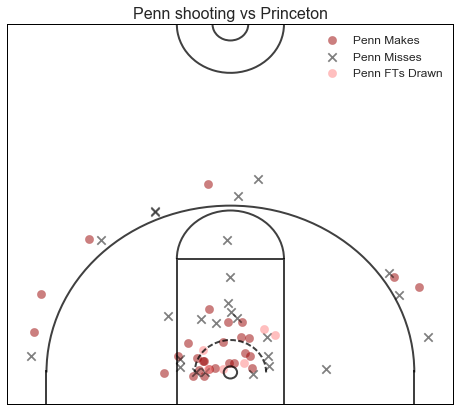

In [15]:
plt.figure(figsize=(8,7))
draw_court(outer_lines=True)

plt.scatter(makes.x, makes.y, s=70, color=make_color, alpha=0.5, marker="o", label=label+" Makes")
plt.scatter(misses.x, misses.y, s=70, color="black", alpha=0.5, marker="x", label=label+" Misses", linewidths=1)
plt.scatter(fouls.x, fouls.y, s=70, color=foul_color, alpha=0.5, marker="o", label=label+" FTs Drawn")

# Descending values along the axis from left to right
plt.xlim(-25,25)
plt.ylim(-4,43)
plt.legend(fontsize=12)
plt.title(title, fontsize=16)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.savefig(output)
plt.show()

In [17]:
shots_df.head()   # for inspection

,Date,half,Team,Opponent,timeRemaining,playerID,makeMiss,xint,yint,distance,x,y
0,1/6/2018,1,Penn,Princeton,1940,21,0,4,4,5.7,4.114585,4.414236
1,1/6/2018,1,Penn,Princeton,1935,0,0,4,2,4.5,4.167712,2.024698
3,1/6/2018,1,Penn,Princeton,1949,4,0,0,9,9.0,-0.250001,8.630271
5,1/6/2018,1,Penn,Princeton,1808,2,0,3,24,24.2,3.085790,23.868768
7,1/6/2018,1,Penn,Princeton,1718,2,2,5,5,7.1,4.964096,4.630370
